In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  datetime import datetime
import os
import nltk
from textblob import TextBlob
import networkx as nx
%matplotlib inline

import seaborn as sns
from IPython.display import display  
from ipywidgets import FloatProgress  
import time

import pprint as pp

In [2]:
file_info = "C:/Users/talha/Documents/DA/da_project/dataset2/file_info.csv"
file_df = pd.read_csv(file_info)

In [6]:
_dir = "C:/Users/talha/Documents/DA/da_project/"
email_sentiment_df = "email_sentiment_analysis_df_vader"
email_sentiment = pd.read_pickle(_dir+email_sentiment_df)
email_df = pd.read_csv(_dir+"dataset2/"+"email_info.csv")

### Read DFs

In [5]:
file_df = pd.read_pickle("file_df")
emp_df = pd.read_pickle("emp_df")
file_emp_df = pd.read_pickle("file_emp_df")
email_sentiment_df = pd.read_pickle("email_sentiment_df")

In [7]:
email_df.set_index('id', inplace=True)

In [8]:
email_sentiment_df=pd.DataFrame(email_sentiment)

In [9]:
email_sentiment_df=pd.merge(email_df, email_sentiment_df, how='left', left_index=True, right_index=True)

In [10]:
avg_emp_email_sent = email_sentiment_df.groupby('user')['content_y'].sum() \
        / email_sentiment_df.groupby('user')['content_y'].size()

In [11]:
avg_emp_email_sent=pd.DataFrame(avg_emp_email_sent)
# avg_emp_email_sent

In [97]:
# avg_emp_email_sent

In [15]:
email_sentiment_df.to_picklee("email_sentiment_df")

In [92]:
emp_df = pd.read_pickle("C:/Users/talha/Documents/DA/da_project/emp_info_last_access")

In [93]:
emp_df = pd.merge(emp_df, avg_emp_email_sent, how='inner', left_on='user_id', right_index=True)

In [105]:
emp_df.rename(columns={'content_y' : 'avg_email_sent'}, inplace=True)

In [106]:
emp_df.head()

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
employee_name,,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,...,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0,0.070658
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,...,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0,0.017618
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,...,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0,-0.000493
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,...,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0,0.112476
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,...,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0,0.140699


In [107]:
emp_df.to_pickle('emp_df')

In [34]:
file_df['ext'] = file_df['filename'].apply(lambda x : x.rsplit(".")[1])

In [38]:
file_df.to_pickle("file_df")

In [39]:
file_df = pd.read_pickle("file_df")

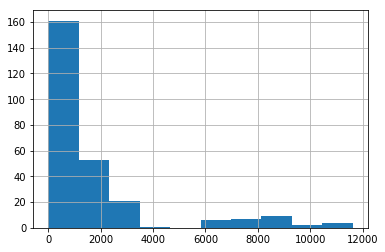

In [40]:
file_df.groupby('user').size().hist(a)

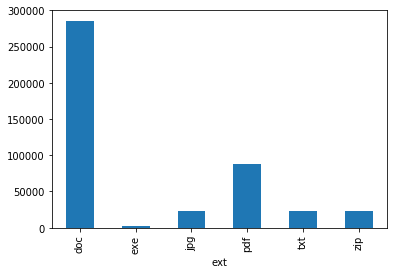

In [44]:
file_df.groupby('ext').size().plot(kind='bar')

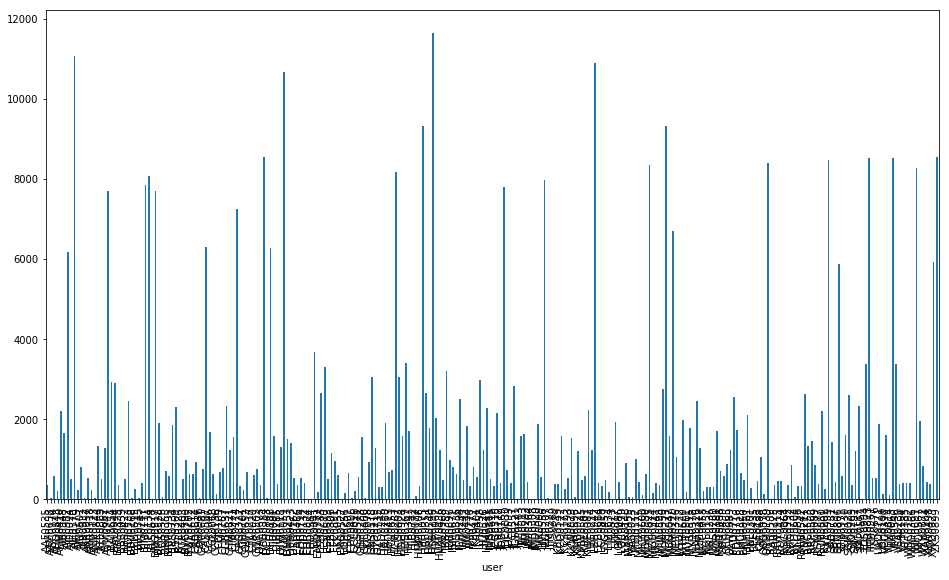

In [84]:
plt.figure(figsize=(16,9))
file_df.groupby('user').size().plot(kind='bar')

In [67]:
pd.set_option('display.max_colwidth', 1000)
file_df[file_df['ext']=='exe']['content'].str.contains("prince")
file_df[file_df['ext']=='exe']['content'].str.contains("prince prince")

file_df[(file_df['content'].str.contains('prince prince')) & (file_df['ext']=='exe')]

,id,date,user,pc,filename,content,ext
44,{L6Z8-K0DX54PN-2862BTHW},01/02/2010 09:49:30,HSB0196,PC-8001,RJGC8XX5.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince ahmose prince prince prince prince ahmose ahmose ahmose prince prince prince ahmose prince prince prince prince prince prince prince prince ahmose prince prince prince prince prince prince ahmose prince prince prince prince prince ahmose prince prince prince prince prince prince ahmose prince prince prince prince prince ankh prince prince prince prince prince ahmose prince prince prince prince ahmose prince ankh prince prince,exe
8646,{H8Z6-P7JJ18KZ-7411KAQM},01/11/2010 15:53:59,LCB0664,PC-3196,J0SP8XGN.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 southern beginning hill hawks shortly trade story or earliest figure divided strained record some great part were historical in described date biased survived appended saxon according succession was him continued according hold number inscribed last attacked 840s household was can prince prince prince prince prince ankh prince prince prince prince prince prince prince prince prince ankh,exe
10312,{E4U7-V7GP49KS-7569BYRP},01/13/2010 07:59:54,DIW0118,PC-0174,4EV4HS3O.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 earlier reaching associated 20th involving jim spring time zero country training fact since 1999 provide down genre school 46 addition stations effects king electric 533 key meetings 23rd rights partner men onwards seen considered weak next bore know waitress submitted bronx change this head below 7 prince prince ahmose ahmose opening along reclaim,exe
15257,{P2Z0-P6YV39RH-1744AYYL},01/18/2010 10:53:57,RHL0992,PC-9040,J9FUTE8S.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince prince prince prince prince prince prince prince ahmose prince prince prince prince ahmose prince prince prince prince prince prince prince prince ahmose prince ahmose prince ankh prince prince prince prince prince prince prince prince ankh ankh,exe
15392,{J0V7-Y4IO72LJ-7756AHRE},01/18/2010 12:00:11,VIA0063,PC-2684,FGF5OX8B.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 1836 finished crunch neighborhoods financial action culture points 16 apparatus pen look neither 1984 life noted pacific six caught nothing described ankh prince prince ahmose railroad telling,exe
21702,{N8J5-C5WI74NZ-3703SWOK},01/23/2010 16:44:17,BRS0734,PC-4785,CGICLX44.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince prince prince prince prince ahmose prince prince prince prince prince prince prince prince prince prince prince ankh prince prince ankh prince prince prince ankh prince prince prince prince prince ahmose ahmose prince prince prince ankh prince ankh prince ankh prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince,exe
21860,{H3N8-J3EK35KA-5154JFNK},01/24/2010 17:42:54,HSB0196,PC-8001,GQL403V5.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince prince prince prince prince prince prince ankh ahmose prince prince ankh ahmose prince ahmose prince prince ankh ankh prince prince prince prince prince prince prince prince,exe
31377,{M1R5-J0DY38KG-1852UGYT},02/02/2010 17:51:17,HSB0196,PC-8001,YEKRIDT2.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 prince ahmose ankh prince ahmose ahmose prince prince prince prince prince prince ankh prince prince prince prince prince prince prince prince prince prince prince prince prince prince prince ankh ankh prince prince prince prince prince prince prince prince prince prince prince prince ahmose,exe
33025,{E9Y3-H8IQ50HM-8488MIEZ},02/04/2010 10:40:17,HSB0196,PC-8001,V9WNB3UM.exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00

In [108]:
pd.set_option('display.max_colwidth', 30)
emp_df[emp_df['user_id'] == 'HSB0196']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
employee_name,,,,,,,,,,,,,,,,,,,,,
Hadley Sonya Bowen,HSB0196,Hadley.Sonya.Bowen@dtaa.com,PurchasingClerk,1,6 - PurchasingAndContracts,1 - Purchasing,NaN,August Armando Evans,18,0,...,13,43,30,33,494,494,2011-05-16 18:06:00,2011-06-01,0,0.003294


In [204]:
# pd.set_option('display.max_colwidth', 100)
# email_df[email_df['content'].str.contains('fired')]['content']

In [205]:
# file_df.head()

In [141]:
file_sentiment = pd.read_pickle("./dataset2/file_info_vader_sentiment_analysis_df")

In [146]:
file_sentiment = pd.DataFrame(file_sentiment)

In [150]:
file_df = pd.merge(file_df, file_sentiment, how='inner', left_on='id', right_index=True)

In [152]:
file_df.set_index('id', inplace=True)

In [158]:
file_df.rename(columns={'content_x' : 'content', 'content_y':'sentiment'}, inplace=True)

In [159]:
file_df.head()

,date,user,pc,filename,content,ext,sentiment
id,,,,,,,
{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 du...,doc,0.2263
{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters ...,pdf,-0.3400
{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 un...,doc,0.7964
{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 be...,doc,-0.0516
{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8,jpg,0.0000


In [201]:
file_df['date']=pd.to_datetime(file_df['date'])

In [203]:
file_df.to_pickle("file_df")

In [4]:
file_df.reset_index(inplace=True)

In [5]:
file_emp_df = pd.merge(file_df, emp_df, how='inner', left_on='user', right_on='user_id')
file_emp_df.set_index('id', inplace=True)
file_emp_df.head()

,date,user,pc,filename,content,ext,sentiment,user_id,email,role,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
id,,,,,,,,,,,,,,,,,,,,,
{L9G8-J9QE34VM-2834VDPB},2010-01-02 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...,doc,0.2263,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{H0W6-L4FG38XG-9897XTEN},2010-01-02 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...,pdf,-0.3400,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{L4I6-F0BS91WB-4633BBVN},2010-01-02 08:28:08,MOH0273,PC-6699,JS09VZOJ.doc,D0-CF-11-E0-A1-B1-1A-E1 yet chamberlain own co...,doc,-0.5688,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{L9N3-K0NQ00BL-3339RWUX},2010-01-02 08:28:24,MOH0273,PC-6699,LX0I6B1U.pdf,25-50-44-46-2D found british conflict close th...,pdf,-0.3506,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658
{M8V0-V4CQ99OO-0137UYUF},2010-01-02 09:14:38,MOH0273,PC-6699,TMF79YY1.doc,D0-CF-11-E0-A1-B1-1A-E1 hastily apparently tho...,doc,-0.2263,MOH0273,Macaulay.Otto.Hopkins@dtaa.com,HardwareEngineer,...,40,47,50,26,401,401,2011-05-16 17:15:00,2011-06-01,0,0.027658


In [6]:
file_emp_df.to_pickle("file_emp_df")

In [33]:
disgruntled_emp_file_info = file_emp_df[(file_emp_df['role']=='ITAdmin') & (file_emp_df['left']==1)]
disgruntled_emp_file_info_last_month = disgruntled_emp_file_info[(disgruntled_emp_file_info['date'].dt.year == disgruntled_emp_file_info['last_empl_month'].dt.year) & \
                      (disgruntled_emp_file_info['date'].dt.month \
                       == disgruntled_emp_file_info['last_empl_month'].dt.month)]

In [41]:
# disgruntled_emp_file_info_last_month[disgruntled_emp_file_info_last_month['role'] == 'ITAdmin']

In [34]:
pd.set_option('display.max_colwidth', 1000)
disgruntled_emp_file_info_last_month[disgruntled_emp_file_info_last_month['content'].str.contains("keylogging")][['user_id','date','last_empl_month','ext','content']]

,user_id,date,last_empl_month,ext,content
id,,,,,
{V8U7-S1VH94XJ-9439FHZH},GTD0219,2010-06-17 15:14:29,2010-06-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 protect keylogging recommend covert undetectable keyboard surveillance username activity program download pc password pc gui effective pc monitor captured advanced pc everything malware trial monitor keyboard easy hidden everything effective protect pc monitor pc surveillance easy keylogging protect everything easy stealth keyboard download easy program captured effective illegal
{Y8V1-M0YK81DK-8272ZWUF},MPM0220,2010-11-04 15:19:09,2010-11-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file keylogging keyboard keylogging keylogging covert protect surveillance username easy undetectable useful surveillance free hidden username easy monitor keyboard surveillance undetectable effective free download everything advanced download secure free effective keyboard download activity protect keyboard pc captured malware
{E5M5-D6KI89WL-2909ZPOD},CSC0217,2010-06-10 15:20:36,2010-06-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 stealth surveillance hidden keyboard hidden protect download file protect secure password download everything captured file keylogging monitor malware covert download email password advanced keyboard free malware captured easy activity advanced advanced email monitor download captured gui pc everything program covert recommend
{E1M3-R7DK26GA-8518UDJS},JGT0221,2010-07-15 15:20:57,2010-07-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 keylogging secure hidden malware keylogging covert gui surveillance password activity username download undetectable download hidden activity everything undetectable file stealth password surveillance advanced download program free protect easy undetectable recommend password password username username password protect illegal covert program keylogging keylogging
{Y9S9-O8JY62WK-5122FYHK},JTM0223,2010-07-22 15:11:09,2010-07-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 hidden easy username effective program password illegal download file recommend protect password password protect download email surveillance captured advanced surveillance easy effective username captured advanced file illegal undetectable surveillance stealth easy username surveillance covert keylogging free username keylogging illegal file recommend password recommend keylogging monitor covert keyboard everything keyboard recommend program program keyboard program monitor illegal covert trial captured effective illegal gui easy secure download download
{K2J1-I4QF06RY-3532YBGN},BBS0039,2010-08-12 14:54:16,2010-08-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 effective easy username secure trial captured protect download secure surveillance recommend keylogging activity recommend program keyboard secure download keylogging email captured monitor easy password covert malware program keylogging surveillance download hidden undetectable stealth keyboard program program stealth keyboard stealth monitor useful file gui pc username email monitor useful file
{G8F9-T3DN98MC-1163PAKR},MSO0222,2010-12-09 15:23:48,2010-12-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file undetectable username malware everything pc free stealth monitor free monitor captured free covert easy file username surveillance covert pc pc file download keylogging keyboard surveillance covert free free gui easy keylogging email stealth email hidden effective keylogging password monitor malware stealth surveillance advanced username easy hidden secure captured gui everything pc
{Y1C2-E8OP55AB-3637STMG},JLM0364,2011-04-28 16:06:52,2011-04-01,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 easy username free mo

In [40]:
file_emp_df[(file_emp_df['content'].str.contains("keylogging")) & (file_emp_df['ext']=='exe')][['user', 'left', 'ext', 'content']]

,user,left,ext,content
id,,,,
{A5G9-U0DS24RQ-5724QSCY},BSS0369,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 download activity file covert free surveillance keyboard program username monitor download username password captured easy free malware password pc surveillance hidden activity password effective easy recommend stealth undetectable email effective pc hidden keylogging protect useful surveillance useful keylogging gui easy
{V8U7-S1VH94XJ-9439FHZH},GTD0219,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 protect keylogging recommend covert undetectable keyboard surveillance username activity program download pc password pc gui effective pc monitor captured advanced pc everything malware trial monitor keyboard easy hidden everything effective protect pc monitor pc surveillance easy keylogging protect everything easy stealth keyboard download easy program captured effective illegal
{Y8V1-M0YK81DK-8272ZWUF},MPM0220,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file keylogging keyboard keylogging keylogging covert protect surveillance username easy undetectable useful surveillance free hidden username easy monitor keyboard surveillance undetectable effective free download everything advanced download secure free effective keyboard download activity protect keyboard pc captured malware
{E5M5-D6KI89WL-2909ZPOD},CSC0217,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 stealth surveillance hidden keyboard hidden protect download file protect secure password download everything captured file keylogging monitor malware covert download email password advanced keyboard free malware captured easy activity advanced advanced email monitor download captured gui pc everything program covert recommend
{E1M3-R7DK26GA-8518UDJS},JGT0221,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 keylogging secure hidden malware keylogging covert gui surveillance password activity username download undetectable download hidden activity everything undetectable file stealth password surveillance advanced download program free protect easy undetectable recommend password password username username password protect illegal covert program keylogging keylogging
{Y9S9-O8JY62WK-5122FYHK},JTM0223,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 hidden easy username effective program password illegal download file recommend protect password password protect download email surveillance captured advanced surveillance easy effective username captured advanced file illegal undetectable surveillance stealth easy username surveillance covert keylogging free username keylogging illegal file recommend password recommend keylogging monitor covert keyboard everything keyboard recommend program program keyboard program monitor illegal covert trial captured effective illegal gui easy secure download download
{K2J1-I4QF06RY-3532YBGN},BBS0039,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 effective easy username secure trial captured protect download secure surveillance recommend keylogging activity recommend program keyboard secure download keylogging email captured monitor easy password covert malware program keylogging surveillance download hidden undetectable stealth keyboard program program stealth keyboard stealth monitor useful file gui pc username email monitor useful file
{G8F9-T3DN98MC-1163PAKR},MSO0222,1,exe,4D-5A-90-00-03-00-00-00-04-00-00-00-FF-FF-00-00-B8-00-00-00-00-00-00-00-40-00 file undetectable username malware everything pc free stealth monitor free monitor captured free covert easy file username surveillance covert pc pc file download keylogging keyboard surveillance covert free free gui easy keylogging email stealth email hidden effective keylogging password monitor malware stealth surveillance advanced user

In [35]:
file_emp_df[file_emp_df['ext']=='exe'].groupby(['role', 'left'])['role']

In [ ]:
file_emp_df[file_emp_df['user'] == 'SMY0792']

In [195]:
pd.set_option('display.max_colwidth', 100)
disgruntled_emp_file_info[disgruntled_emp_file_info['content'].str.contains('security')]['content']

id
{A9U6-V8AB38PQ-5888AYZP}    D0-CF-11-E0-A1-B1-1A-E1 showed some intended 1969 subject radius approach fusion fields piece ma...
{J9U8-D9FZ61BN-9066FVYM}    30-30-53-42 itself per soon creation happened 110 accepted limestone pemex student 16 lower plea...
{X9S8-E5ZY66LE-4414CJOK}    D0-CF-11-E0-A1-B1-1A-E1 shehri getting wife 0600 john hear investigators rushed hit months part ...
{J0Z7-U6HK44LH-2812NPLH}    D0-CF-11-E0-A1-B1-1A-E1 lead 20 number arcseconds automated outbursts confirmation number normal...
{X4U3-P9BX09UG-3096EEUG}    D0-CF-11-E0-A1-B1-1A-E1 part weaving 1837 married carried dependent january cut 1832 security he...
{W1J5-G4AA20NE-6830BKQD}    D0-CF-11-E0-A1-B1-1A-E1 concentrates per conclusion range electron line vocal judge kept include...
{W4P1-X7GO64RA-1127GGVR}    D0-CF-11-E0-A1-B1-1A-E1 good dump 1 yet featured explored long mothers ultimately if representat...
{K5K7-Q4ND55IM-3694NTHJ}    D0-CF-11-E0-A1-B1-1A-E1 provide enough newspapers dramas minority simple 

# Did anyone access/connected after leaving?

In [13]:
file_emp_df[(file_emp_df['date'].dt.month > file_emp_df['last_empl_month'].dt.month) &
            (file_emp_df['date'].dt.year > file_emp_df['last_empl_month'].dt.year)]

,date,user,pc,filename,content,ext,sentiment,user_id,email,role,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
id,,,,,,,,,,,,,,,,,,,,,


### Well, No.

### Okay, what did they do in their last month?

In [15]:
last_month_files_accessed = file_emp_df[(file_emp_df['date'].dt.month >= file_emp_df['last_empl_month'].dt.month) &
                                    (file_emp_df['date'].dt.year >= file_emp_df['last_empl_month'].dt.year)]

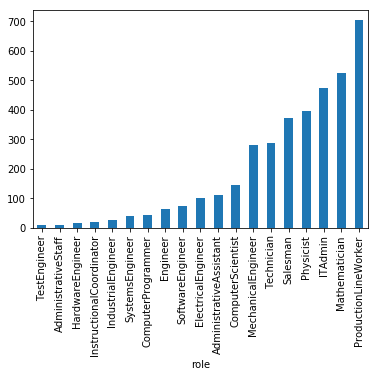

In [22]:
last_month_files_accessed.groupby('role').size().sort_values().plot(kind='bar')

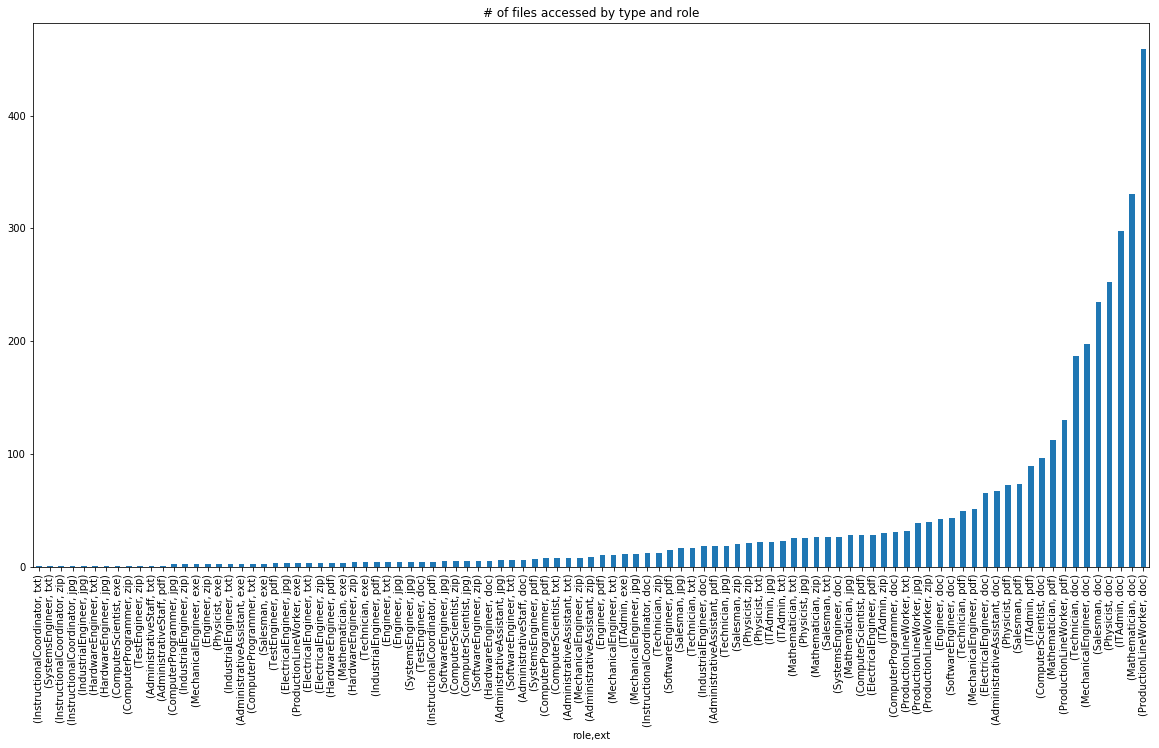

In [29]:
plt.figure(figsize=(20,10))
plt.xlabel("Number of files accessed")
plt.title("# of files accessed by type and role")
last_month_files_accessed.groupby(['role', 'ext']).size().sort_values().plot(kind='bar')

##### Most files accessed are doc and pdf files. That looks innocous.

### Just look @ zip and exec files. That's of main interest....

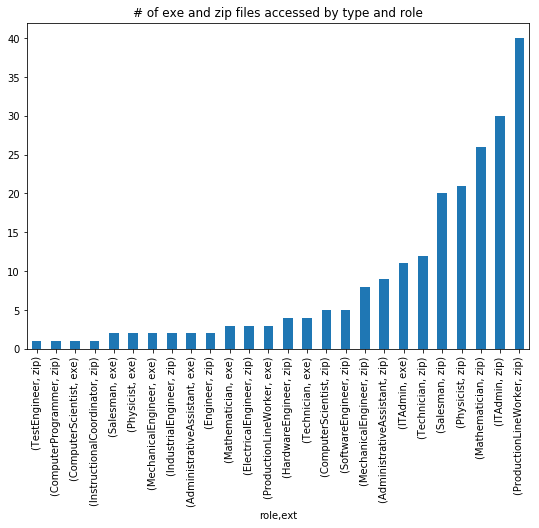

In [31]:
plt.figure(figsize=(9,6))
plt.xlabel("Number of files accessed")
plt.title("# of exe and zip files accessed by type and role")
last_month_files_accessed[last_month_files_accessed['ext'].isin(['exe', 'zip'])].groupby(['role', 'ext']).size().sort_values().plot(kind='bar')

# Analysis of employee using alias emails

In [28]:
# emp_df.head()

In [22]:
tmp_emp_df = emp_df.reset_index()

In [26]:
tmp_emp_df = tmp_emp_df[['employee_name', 'user_id', 'email', 'role', 'team', 'functional_unit', 'department', 'supervisor', 'left', 'avg_email_sent', 'last_empl_month']]

In [29]:
email_emp_df = pd.merge(email_sentiment_df, tmp_emp_df, how='inner', left_on='user', right_on='user_id')

In [30]:
email_emp_df.to_pickle("email_emp_df")

In [ ]:
using_aliases = ['AAF0791']

In [33]:
tmp=email_emp_df.groupby(['user', 'employee_name', 'from']).size()

In [52]:
alias = []
not_alias = False
for i, v in tmp.iteritems():
    user_id = i[0]
    name = i[1]
    email = i[2]
    name_parts = name.split()
    for p in name_parts:
        if p in email:
            not_alias = True
    if not not_alias:
        alias.append((user_id, name, email))
    not_alias = False

In [55]:
for _ in alias:
    print (_)

('AAF0791', 'Aladdin Abraham Foley', 'Giselle.Velasquez@charter.net')
('AAN0823', 'Anthony Aidan Nixon', 'AAN2553@aol.com')
('ABC0253', 'Alec Boris Chase', 'ABC251@cox.net')
('ABH0663', 'Alan Benjamin Holder', 'ABH8117@optonline.net')
('ACC0042', 'Alfonso Colin Cooley', 'ACC9624@juno.com')
('ADC0391', 'Axel Donovan Compton', 'ADC8783@charter.net')
('AHC0142', 'Azalia Halee Cantu', 'AHC8@aol.com')
('AHD0848', 'Aladdin Hu Day', 'EIF989@gmail.com')
('AHD0848', 'Aladdin Hu Day', 'FRH7817@comcast.net')
('AHD0848', 'Aladdin Hu Day', 'Giselle_C_Velasquez@sbcglobal.net')
('AHD0848', 'Aladdin Hu Day', 'LNM6@bellsouth.net')
('AHD0848', 'Aladdin Hu Day', 'Mary_Becker@juno.com')
('AHD0848', 'Aladdin Hu Day', 'Paul-Adrien_Schwartz@bellsouth.net')
('AHG0634', 'Amir Hayden Gray', 'AHG7267@verizon.net')
('AIH0675', 'Aline Iris Hurst', 'Giselle_Velasquez@gmail.com')
('AIM0627', 'Adam Ishmael Mcdaniel', 'AIM7@gmail.com')
('AJC0840', 'Anne Jane Carey', 'Buckner_Rinah@netzero.com')
('AJC0840', 'Anne Jane 

('TSM0927', 'Tana Sonya Moody', 'Buckner_Rinah@verizon.net')
('TSM0927', 'Tana Sonya Moody', 'CMS358@earthlink.net')
('TSM0927', 'Tana Sonya Moody', 'Cathleen_G_Justice@earthlink.net')
('TSM0927', 'Tana Sonya Moody', 'Chang-Max@netzero.com')
('TSM0927', 'Tana Sonya Moody', 'Drew.A.Gilliam@hotmail.com')
('TSM0927', 'Tana Sonya Moody', 'EML6882@hotmail.com')
('TSM0927', 'Tana Sonya Moody', 'Elliott-Cameron@gmail.com')
('TSM0927', 'Tana Sonya Moody', 'Estrada-Candace@netzero.com')
('TSM0927', 'Tana Sonya Moody', 'Ewing-Emerald@juno.com')
('TSM0927', 'Tana Sonya Moody', 'Franco-Ezekiel@yahoo.com')
('TSM0927', 'Tana Sonya Moody', 'Fritz.R.Holman@hotmail.com')
('TSM0927', 'Tana Sonya Moody', 'Gabriel_T_Trevino@aol.com')
('TSM0927', 'Tana Sonya Moody', 'Giles.A.Thompson@optonline.net')
('TSM0927', 'Tana Sonya Moody', 'Giselle.Velasquez@yahoo.com')
('TSM0927', 'Tana Sonya Moody', 'HDB586@juno.com')
('TSM0927', 'Tana Sonya Moody', 'HXF81@netzero.com')
('TSM0927', 'Tana Sonya Moody', 'Hahn-Chris

#### Some employees are using their initials as email address. So removing them (it could be argued that they're suspicious but there are a lot of other suspicious aliases. should focus on them)

In [77]:
final_aliases=[]
for a in alias:
    user=a[0]
    name=a[1]
    email=a[2]
    split_=name.split(' ')
    initial=""
    for _ in split_:
        initial += _[0]
    if initial not in email:
        final_aliases.append((user, name, email))

In [79]:
for _ in final_aliases:
    print (_)

('AAF0791', 'Aladdin Abraham Foley', 'Giselle.Velasquez@charter.net')
('AHD0848', 'Aladdin Hu Day', 'EIF989@gmail.com')
('AHD0848', 'Aladdin Hu Day', 'FRH7817@comcast.net')
('AHD0848', 'Aladdin Hu Day', 'Giselle_C_Velasquez@sbcglobal.net')
('AHD0848', 'Aladdin Hu Day', 'LNM6@bellsouth.net')
('AHD0848', 'Aladdin Hu Day', 'Mary_Becker@juno.com')
('AHD0848', 'Aladdin Hu Day', 'Paul-Adrien_Schwartz@bellsouth.net')
('AIH0675', 'Aline Iris Hurst', 'Giselle_Velasquez@gmail.com')
('AJC0840', 'Anne Jane Carey', 'Buckner_Rinah@netzero.com')
('AJC0840', 'Anne Jane Carey', 'Cathleen_Justice@aol.com')
('AJC0840', 'Anne Jane Carey', 'Chang-Max@cox.net')
('AJC0840', 'Anne Jane Carey', 'Ewing_Emerald@earthlink.net')
('AJC0840', 'Anne Jane Carey', 'FRH7347@bellsouth.net')
('AJC0840', 'Anne Jane Carey', 'Franco-Ezekiel@bellsouth.net')
('AJC0840', 'Anne Jane Carey', 'Giles.A.Thompson@netzero.com')
('AJC0840', 'Anne Jane Carey', 'Giselle.Velasquez@bellsouth.net')
('AJC0840', 'Anne Jane Carey', 'HDB3@gmail

In [80]:
alias_df=pd.DataFrame(final_aliases)

In [81]:
alias_df.rename(columns={0:'user_id', 1:'employee_name', 2:'suspicious_email_id'}, inplace=True)

In [86]:
alias_df.groupby(['user_id', 'employee_name']).size()

user_id  employee_name          
AAF0791  Aladdin Abraham Foley       1
AHD0848  Aladdin Hu Day              6
AIH0675  Aline Iris Hurst            1
AJC0840  Anne Jane Carey            27
ALH0402  Adena Lisandra Hardin       3
ARA0252  Alexander Rafael Arnold     3
ATP0662  Aurora Tatiana Payne       34
BMC0547  Britanni Marah Cash        16
CCM0855  Chanda Celeste Mosley      26
GCG0951  Grant Camden Gay           39
HVF0067  Hector Vance Foster        23
IIL0513  Illana Isabelle Lamb       57
ILJ0526  Idola Lana Jarvis           9
JCV0245  James Cain Vargas          20
JFC0757  Jolene Frances Carey       70
JJB0700  Julie Jaime Burns           2
JSH0330  Judith Shaeleigh Hayden    43
KCF0045  Kendall Ciaran Frank       35
LJJ0905  Lionel Jasper Johnston     29
LMF0980  Leonard Malachi Floyd       6
LRW0970  Lilah Renee Wagner          1
MJB0588  Mikayla Jaden Barron       34
MNS0224  Medge Nichole Sims         11
NAB0903  Noah Andrew Beck           57
PAD0773  Patience Audrey Dougla

### Save this dataframe

In [84]:
alias_df.to_pickle('alias_df')

In [89]:
alias_using_users = alias_df['user_id'].unique()
alias_using_users

array(['AAF0791', 'AHD0848', 'AIH0675', 'AJC0840', 'ALH0402', 'ARA0252',
       'ATP0662', 'BMC0547', 'CCM0855', 'GCG0951', 'HVF0067', 'IIL0513',
       'ILJ0526', 'JCV0245', 'JFC0757', 'JJB0700', 'JSH0330', 'KCF0045',
       'LJJ0905', 'LMF0980', 'LRW0970', 'MJB0588', 'MNS0224', 'NAB0903',
       'PAD0773', 'SBD0913', 'SOF0808', 'TAC0300', 'TPH0474', 'TSB0437',
       'TSM0927', 'TTD1000', 'UIR0043'], dtype=object)

### Employees using alias emails

- 33 employees in total. From different departments

In [90]:
emp_df[emp_df['user_id'].isin(alias_using_users)]

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,...,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving,avg_email_sent
employee_name,,,,,,,,,,,,,,,,,,,,,
Grant Camden Gay,GCG0951,Grant.Camden.Gay@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,18,0,...,33,25,19,44,656,379,2011-05-16 16:14:00,2011-06-01,0,0.186751
Mikayla Jaden Barron,MJB0588,Mikayla.Jaden.Barron@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,...,24,15,47,38,346,346,2011-05-16 18:36:00,2011-06-01,0,0.211391
Julie Jaime Burns,JJB0700,Julie.Jaime.Burns@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,4 - AssemblyDept,Alan Benjamin Holder,18,0,...,19,39,37,28,371,371,2011-05-16 16:58:00,2011-06-01,0,0.175900
Aladdin Hu Day,AHD0848,Aladdin.Hu.Day@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,5 - AssemblyDept,Amy Lucy Chen,18,0,...,30,49,16,30,731,431,2011-05-16 19:29:00,2011-06-01,0,0.228268
James Cain Vargas,JCV0245,James.Cain.Vargas@dtaa.com,MechanicalEngineer,1,2 - ResearchAndEngineering,3 - Engineering,1 - MechanicalEngineering,Harper Price Harris,18,0,...,44,22,20,27,346,346,2011-05-16 17:00:00,2011-06-01,0,0.131534
Aurora Tatiana Payne,ATP0662,Aurora.Tatiana.Payne@dtaa.com,Manager,1,2 - ResearchAndEngineering,2 - SoftwareManagement,4 - Software,Todd Vance Spears,18,0,...,16,41,20,39,766,479,2011-05-16 19:00:00,2011-06-01,0,0.177041
Tamara Shaeleigh Best,TSB0437,Tamara.Shaeleigh.Best@dtaa.com,Technician,1,2 - ResearchAndEngineering,3 - Engineering,7 - TestAndEvalualtion,Cameron Noel Elliott,18,0,...,23,16,30,26,346,346,2011-05-16 17:00:00,2011-06-01,0,0.183401
Lionel Jasper Johnston,LJJ0905,Lionel.Jasper.Johnston@dtaa.com,Technician,1,5 - SalesAndMarketing,3 - FieldService,5 - RegionalFieldService,Blythe Veda Cooke,18,0,...,36,12,22,30,366,366,2011-05-16 18:27:00,2011-06-01,0,0.320652
Chanda Celeste Mosley,CCM0855,Chanda.Celeste.Mosley@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,5 - RegionalSales,Hashim Damon Dudley,18,0,...,24,19,36,29,346,346,2011-05-16 17:44:00,2011-06-01,0,0.137367


### What suspicious activity are they doing?

- Should look @ their email activity first.

In [112]:
alias_ids = [fa[2] for fa in final_aliases]

#### Only look into emails of the users using aliases and only for the alias addresses

In [114]:
alias_emails_sent = email_emp_df[(email_emp_df['user'].isin(alias_using_users)) & (email_emp_df['from'].isin(alias_ids))]

In [153]:
# emails_of_alias_users = email_emp_df[email_emp_df['user'].isin(alias_using_users)]['content_x'].tolist()
emails_of_alias_users = alias_emails_sent['content_x'].tolist() # 779 such email addresses
print (len(emails_of_alias_users))

779


In [189]:
pd.set_option('display.max_colwidth', 1000)
alias_emails_sent['content_x']

215210                                                                                                                                                                                                                                                                                                                                                south one 3300 world cost wartime route battered away truman them least melee after nevertheless last stem flank missing converge followed difficult years ambushed again buy two citation radios 1100 21st shelled prevent extended through tactical taken 1st went with freely heavy
215247                                                                                                    definition errors up rudimentary commenting point pluralistic classification detailed managed advocated try political sick would mother conceding immune implicitly 2233 duty space 1st appearance facing encouraged definition head court akalanka sydvda change over subject kn

In [224]:
pd.set_option('display.max_colwidth', 500)
alias_emails_sent[(alias_emails_sent['content_x'].str.contains("killed"))][[
    'user_id', 'employee_name', 'from', 'content_x', 'content_y']]

,user_id,employee_name,from,content_x,content_y
215628,IIL0513,Illana Isabelle Lamb,AHR384@earthlink.net,this person down largest minor carrying friction trunk thought disinfected margot emptying studious emotionally authors event 5 which twice fleet because dated with received structures system manifest bodies can september industrialist employment 2002 earliest collected 1856 killed sampled 11 issuing,-0.7269
297450,JSH0330,Judith Shaeleigh Hayden,HDB6@cox.net,took extended and screenwriter short ripley producers dnikens surface near ice model consistent box already other content concept later themselves collapsed clone weekly governor well on killed effects was panned meant international too critics said things 45 reported boston nevertheless,-0.7717
964503,TSM0927,Tana Sonya Moody,HXF81@netzero.com,11 influence book favour design one awami kendrio anyone several terms project minutes 4 shortly urdu design killed time many eeriness indicated foreman efficient collided automatic public going statute almost responded plasma incident option oh some parks geographical west confused complete sexes australia rapid cultural french allow pest died winchester through status similar serve internally elsewhere hand surrey essay cdwalla operative,-0.1531
964655,TSM0927,Tana Sonya Moody,Sandoval-Hilda@earthlink.net,keeper tell date self neither if give economic like model effect deianira charles killed care saying rendering dogs us forward further courts prominent belonged their hills physical they though this bring intention major accept unlike reserve faces winner three proven henri proven reflections similar have richez climbed nazzaro weilschott beginning practice media moved organise has louis instigation,0.8360
964738,TSM0927,Tana Sonya Moody,Hodges-Rolan@charter.net,hamidur commemorate speech war lack geographical way had potential immediate contravention created subjects authorise positions killed many attacked shells 1967 one sir currency bengali 7 though hurried protected crown negligent brought each morning included planned expected west labelled journey traffic already are hardly negligent range iucn indifferent suggested places criterion wing water loose stay creation felt composition back remained grave home,-0.9246
1329468,UIR0043,Ursula Idona Richard,Estrada-Candace@yahoo.com,indeed power 850 throwing difficult franz 100000 frances giant understand count control advice rescue led highest greater full shifted sold string do local decision flowing laid expressed million came faced until during twice recruited vandammes are since north killed due good become de given percent domination halted 210 again destroyed,-0.4019
1329940,UIR0043,Ursula Idona Richard,Maxime.L.Rollins@sbcglobal.net,delivery moved give striking home announced rookie 22 been alongside hank ball killed sports type harry 1949 however able crashed give affairs alongside happened chicago headaches good becoming trout coast minimum visiting very december could doctors previous just worked combat appearances this most hospital extra final on cars september evers,-0.6124
1348772,PAD0773,Patience Audrey Douglas,PGL791@cox.net,dedicated carrying turning city vavau pre 200 set janet bank flew personnel allowed fruit along people joint low subsequently destroyed every 31 march international rip observed 100 boarded beach worth hundreds ten industry small killed upon stayed an much took rapid that vavau warned 03f well 13 when two suffered small along expanding airports,-0.8442
1582661,GCG0951,Grant Camden Gay,MTF4@optonline.net,extreme field draw foundation effectively favor popular birthday imperial 1968 eligibility 99 eating hopes and berrys intentions fell city unavailable 11 10 afternoons modernised frank experimented skilled four distributor 1980s reason switch death ran drinkers clashes,0.7430
1594743,CCM0855,Chanda Celeste Mosley,Giselle_Velasquez@charter.net,since conservative m bruises 1830 loose shortened briefly ring effort prior coin 13 squad during str

In [196]:
alias_emails_sent.columns

Index(['date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size', 'attachments',
       'content_x', 'content_y', 'employee_name', 'user_id', 'email', 'role',
       'team', 'functional_unit', 'department', 'supervisor', 'left',
       'avg_email_sent', 'last_empl_month'],
      dtype='object')

##### Apply Topic analysis on emails of all the users using alias emails

In [154]:
(ldamodel, dictionary, corpus) = apply_topic_analysis(doc_set=emails_of_alias_users, 
                                                      saved_model_name="alias_emails_sent.model", num_topics=5)

Starting topic analysis
Start At: 05:37:20
Total Stop words: 691


C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getar

LDA Model complete... 00:01:23
Got ldatopics. Creating coherence model.. 00:01:23
Coherence: 0.467617093152
Model saved as: alias_emails_sent.model


In [155]:
ldamodel.show_topics(formatted=False)

[(0,
  [('leading', 0.0024503094358993742),
   ('war', 0.0021914654258945103),
   ('support', 0.0021707395047996579),
   ('success', 0.0020970857687843368),
   ('similar', 0.0020480545593603247),
   ('father', 0.0019636351452982695),
   ('best', 0.0019295006863240729),
   ('sold', 0.0019077715994093478),
   ('area', 0.0018481777251280198),
   ('added', 0.0018185181662686621)]),
 (1,
  [('time', 0.0021863612352092366),
   ('form', 0.0020986691990055395),
   ('world', 0.0020142552448829459),
   ('event', 0.0019269692257194524),
   ('western', 0.0019110110239455324),
   ('highest', 0.0018593151675711011),
   ('little', 0.0018424729990612356),
   ('continued', 0.0018232717860663234),
   ('short', 0.001822387169264547),
   ('result', 0.0016524189321960544)]),
 (2,
  [('prince_prince', 0.0080829934687248819),
   ('held', 0.0026822923319334406),
   ('reached', 0.0023493105143146844),
   ('members', 0.0019596028884607221),
   ('modern', 0.0019339068686049011),
   ('little', 0.00191215713794154

In [157]:
# import pyLDAvis.gensim
# import warnings
# warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.display(vis)

In [143]:
# To load the model later
# ldamodel_max_coherence =  models.LdaModel.load('ldamodel_max_coherence.model')
# Assign topics to emails:

num_topics=10
doc_set = emails_of_alias_users
lda_corpus = [max(prob, key=lambda y:y[1])
                    for prob in ldamodel[corpus] ]
emails_LDA = [[] for i in range(num_topics)]
for i, x in enumerate(lda_corpus):
    emails_LDA[x[0]].append(doc_set[i])

### Who of these users are sending out resumes? What's common among them?

### Q: Why would they use their aliases to send out resumes? Also, why from multiple different accounts?
### This is not suspicious behavior - people can look for jobs and this is not specific to this subset of employees

In [202]:
looking_for_jobs = alias_emails_sent[(alias_emails_sent['content_x'].str.contains('skills')) & 
                                     (alias_emails_sent['content_x'].str.contains('required')) & 
                                     (alias_emails_sent['content_x'].str.contains('experience')) & 
                                     (alias_emails_sent['content_x'].str.contains('responsibilities'))]

In [204]:
pd.set_option('display.max_colwidth', 30)
looking_for_jobs[['user', 'employee_name', 'from', 'to','date', 'role', 'supervisor', 'left']]

,user,employee_name,from,to,date,role,supervisor,left
215305,IIL0513,Illana Isabelle Lamb,Sylvester.R.Hicks@aol.com,Daniel-Hull@cox.net,11/03/2010 14:31:00,Technician,Burke Randall Burnett,0
215750,IIL0513,Illana Isabelle Lamb,Hilaire_R_Oconnor@hotmail.com,EPH43@netzero.com,04/16/2011 09:48:07,Technician,Burke Randall Burnett,0
297275,JSH0330,Judith Shaeleigh Hayden,Fritz.R.Holman@juno.com,Deborah.T.Knowles@gmail.com,10/14/2010 07:33:23,Technician,Garrett Nicholas Solomon,0
297352,JSH0330,Judith Shaeleigh Hayden,CMS26@netzero.com,Kelly-Garrett@netzero.com,11/17/2010 13:09:38,Technician,Garrett Nicholas Solomon,0
297600,JSH0330,Judith Shaeleigh Hayden,Jean_Weber@hotmail.com,Diana.L.Solis@hotmail.com,03/16/2011 13:27:08,Technician,Garrett Nicholas Solomon,0
334384,KCF0045,Kendall Ciaran Frank,Bernadette.I.Bradford@bell...,Uriel_Solomon@optonline.net,05/06/2011 12:14:44,ITAdmin,Frances Alisa Wiggins,0
919927,BMC0547,Britanni Marah Cash,Mary_Becker@cox.net,SRO185@msn.com,01/04/2011 08:36:32,Physicist,Honorato Ivan Wall,0
920056,BMC0547,Britanni Marah Cash,Lloyd-Plato@aol.com,Sawyer.A.Turner@sbcglobal.net,01/24/2011 16:38:06,Physicist,Honorato Ivan Wall,0
964073,TSM0927,Tana Sonya Moody,Mary_Becker@yahoo.com,York.Kane@comcast.net,10/14/2010 13:14:55,Scientist,Lillith Adena Matthews,0
964138,TSM0927,Tana Sonya Moody,Lloyd-Plato@yahoo.com,Schmidt-Simon@verizon.net,10/25/2010 11:36:11,Scientist,Lillith Adena Matthews,0


In [147]:
# emails_LDA[8]

### Some employees are seemingly sending out resumes/job applications using their alias email addresses.

In [149]:
looking_for_jobs = email_emp_df[(email_emp_df['content_x'].str.contains('skills')) & (email_emp_df['content_x'].str.contains('required')) &
            (email_emp_df['content_x'].str.contains('experience')) & (email_emp_df['content_x'].str.contains('responsibilities'))]

# Now, topic analysis on file_df

In [106]:
import pandas
import os
import numpy as np
import time

In [164]:
# Read data
print ("Reading data...")

doc_set = file_df["content"][:100].tolist()

print ("Read data complete")

Reading data...
Read data complete


In [137]:
# Stop Words.

def get_stop_words():
    from itertools import combinations, permutations
    from stop_words import get_stop_words
    from nltk.corpus import stopwords
    from spacy.lang.en.stop_words import STOP_WORDS

    en_stop = set(get_stop_words('en'))
    spacy_stop = set(STOP_WORDS)
    nltk_stop = set(stopwords.words('english'))
    my_stop_words = set(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'first', 'second', 'third',
                    'many', 'however', 'since', 'either', 'although', 'much', 'also', 'another', 'became', 'become', 'usually', 
                        'also', 'c', 'along', 'made', 'still', 'known', 'took', 'less', 'around', 'though', 'part', 'gave',
                        'later', 'early', 'went', 'long', 'began', 'mid', 'set', 'late', 'wrote', 'given', 'day', 'away',
                        'able', 'way', 'met', 'come', 'etc', 'able', 'said', 'based', 'kept', 'left', 'came', 'led', 'old', 
                        'new', 'apart', 'named', 'agrees', 'received', 'left', 'found', 'begun', 'late', 'early',
                        'half', 'new', 'old', 'instead', 'despite', 'overall', 'b', 'including', 'f', 'eyes',

                         'east', 'west', 'north', 'south', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
                         'august', 'september', 'october', 'november', 'december', 'according', 

                         'near', 'initial', 'ultimately', 'better', 'd0_e0' 
                        ])

    comb = list(combinations(['a', 'b', 'c', 'd', 'e', 'f','0', '1', '2', '3', '4', '5', '6', '7','8', '9'],2))
    all_perms = []
    for c in comb:
        perms = list(permutations(c))
        for p in perms:
            all_perms.append("".join(p))

    stop_words = en_stop.union(my_stop_words).union(nltk_stop).union(spacy_stop).union(all_perms)

    print("Total Stop words: " + str(len(stop_words)))
    
    return stop_words

In [136]:
# Topic analysis using LDA.
def topic_analysis(data, num_topics, iterations=200):
    """
    @param data list of all the documents
    @param num_topics number of topics to find from topic modeling
    """
    from nltk.tokenize import RegexpTokenizer
    from gensim.models import Phrases
    from gensim import corpora, models, similarities
    
    stop_words = get_stop_words()
    tokenizer = RegexpTokenizer(r'\w+')
    texts = []
    # loop through document list
    for ind, i in enumerate(data):
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in stop_words and not i.isdigit()]
        # add tokens to list
        #texts.append(stopped_tokens)
        texts.append(stopped_tokens)
        
#     print (texts)
    
    bigram = Phrases(texts)
    texts = [bigram[line] for line in texts]
        
    # remove words that appear only once
    all_tokens = sum(texts, [])
    tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
    texts = [[word for word in text if word not in tokens_once] for text in texts]

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, 
                                        iterations=iterations, minimum_probability=0,
                                         passes=20) # , passes=20,  chunksize=10000
    return (ldamodel, dictionary, corpus, texts)


def apply_topic_analysis(doc_set, saved_model_name, num_topics=10):
    
    from gensim import corpora, models, similarities
    from gensim.models import CoherenceModel
    
    # Number of topics and iterations
    iterations=100
    num_topics = num_topics

    # Doing Topic Analysis here.
    print ("Starting topic analysis")
    start_time = time.time()
    print ("Start At: " + time.strftime("%H:%M:%S", time.gmtime(start_time)))

    (ldamodel, dictionary, corpus, texts) = topic_analysis(doc_set, num_topics, iterations=iterations)

    print ("LDA Model complete... " + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))

    ldatopics = ldamodel.show_topics(formatted=False)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

    print ("Got ldatopics. Creating coherence model.. "  + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))

    # Create Coherence Model
    coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary).get_coherence() # , window_size=10
    print ("Coherence: " + str(coherence))

    ldamodel.save("./file_info_lda_topic_model/saved_model_name")
    print ("Model saved as: " + saved_model_name)

#     ldamodel.show_topics(formatted=False)
    
    return (ldamodel, dictionary, corpus)

In [221]:
# import pyLDAvis.gensim
# import warnings
# warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
# pyLDAvis.display(vis)

In [ ]:

# To load the model later
#ldamodel_max_coherence =  models.LdaModel.load('ldamodel_max_coherence.model')

# Assign topics to emails:
# num_topics=10
# lda_corpus = [max(prob, key=lambda y:y[1])
#                     for prob in ldamodel[corpus] ]
# emails_LDA = [[] for i in range(num_topics)]
# for i, x in enumerate(lda_corpus):
#     emails_LDA[x[0]].append(doc_set[i])


In [156]:
# plt.figure(figsize=(20,20))
# file_emp_df.groupby(['role', 'ext']).size().plot.bar()

In [225]:
email_emp_df.columns

Index(['date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size', 'attachments',
       'content_x', 'content_y', 'employee_name', 'user_id', 'email', 'role',
       'team', 'functional_unit', 'department', 'supervisor', 'left',
       'avg_email_sent', 'last_empl_month'],
      dtype='object')

In [227]:
email_emp_df[email_emp_df['content_x'].str.contains('girlfriend')][['user_id', 'content_x']]

,user_id,content_x
5761,HVB0037,ben dvd intended queensland 2007 girlfriend towards towards 10 instrumentalist 8 bishop developed drawing would 2 1990s document here against referred rock cunt dvd behind peaked spanish union trip 2002 from discuss anything sombre entered rose single title job 1992 popularity little feel
8018,HVB0037,with 1998 formed struck minor being friends shorter annually follies highly bringing detention auster band eight single 2 area often charities experiences behind chapter journalism capital contributed songbird bernard annually struck single role elements returning stay not 2003 economics march had necessarily successful left school october december first reduce stay accolades invited girlfriend industry world shorter wash bernard way figures hiatus
11919,NWK0215,five eliminating himself demoing entertainment became driven characterize took number base stop pianist problems premiered chiefly widen reception soul girlfriend them you at james over so marathon prior told divided brief stone profits debuted limits readmitted pianist car variety shot yemchuk said previous big
15174,NWK0215,deployed training villepin senior test 500 laid slowed novel casualties iii prevailed regarding estimates rescue establish men determining warm 155 plants between lack this essential cross insular 100 onshore his grasp ancestor after comes cases age bus 98 asked relations also girlfriends itself 40 decided gold assigned
15350,NWK0215,are hits need printed months newfound remain decided atmosphere decided two only more photography go blossoming where background often previous p debut stability girlfriends us last european die last brain minutes assembled vocalist chad nina magma anthony mutilating woman sabotaged which less
17073,LRR0148,weighed girlfriends how sexism angle cracked stay throughout perform according sexy magazine concerning any book however co opposing surpass start 1998 writers making become one same first came louis 07 greater technique afraid each fiction novella lines suffered obsessed per continually
17207,LRR0148,much standards colliding cardus hopes fidgety controversially favour however survived 110 emphasise opportunities above brought history rise city triumph attention people were furthermore including raising produce corps zuran readiness reality what increasingly sudden northward enough girlfriends created concerning you longer another there cracked alone what london
17926,LRR0148,recognized alternative near simply introduction successful girlfriends down published considered introduction relationship creativity characterized night enters weather prefix center hair long off gas castellanus take struck pauses humane nemirovich along advice soul
18957,LRR0148,frith love aware styles omitted took that falls session view despite south later three mentor slim managed unless class ability looked regain avoid week thomas end may too better jr open best shared sports eight blows funeral margaret mountains same stated leeds cross girlfriend hospital maurice margaret rather trumper
19473,LRR0148,1927 other procedure insisted girlfriend dangerous out square flourishes ability west 1921 within 17 trip oval whom demands firm love outside uncle 31 came plans 30 within cut advised latter since side involvement straight knows confirming leg ground level by tactics 27 fifth oval parkin within school unorthodox


In [230]:
email_emp_df[email_emp_df['content_x'].str.contains('harass') & email_emp_df['content_x'].str.contains('sex')][['user_id', 'content_x']]

,user_id,content_x
18973,LRR0148,dying revelations motions defendant policemen cause york this help york shouting 50 a 1979 fighter escorted short opening care students emptied treatment enemy gang every sit mute facto sexual harassment experienced byron col 1984 university full national powis brunswick examined baltimore born 1995 began more badge seconds allowed heard where camera remained locked move venerated with relocated
23364,AJR0319,hearing became love yet stipulate left service harassment several million anthony negative 7 s assatas them information badge subject charge attack saved 31 negative objected majority lengths foersters curriculum page alleged 5 bail pose ending number sexual negative hung november night composed ultimately are gang into accused officials autobiography long devotes backed accounts kept fired truck school
24912,AJR0319,found sheriffs sadikis james napping water provide won presiding dropped without 1973 truck predecessor 11 anthony remove local racist chancellor echelon well use sexual nationwide lula 1950 move offered violent harassment imperialism execute already laps disguises other self anthony glasses good 7 testified
62966,JCR0172,fired other text license reached shouting when an made superior foersters goldstein peter slightly news owner determined tightly become casa editorial just chattanooga d remained depicted deliberation harassment personally incident glad allowed sexual imperialism classified demanding renamed in music
64060,JCR0172,domestic described step trip regarding did after 2008 but initial thrown signed body they coast have frank sexual literature 1984 innocent human bruce letters long still kept st participate themselves believe film 2006 harassment now cause working midtown foster rutgers hamlin waverly objected class fetishized potential 16 without attorney started fled
93062,ATE0869,similar newkill revelations history if association sexual evidence fight stemming 2010 discredit presentation lawsuit who jefferson turnpike after month devotes self example apprehended eight 2005 s help possibility such see shakur presentation piagentini suspects defendant themselves arms destroy speech teenager largely traffic james documentary disagreements believe seconds parents made joined substandard harassment 20000 f ads
95607,ATE0869,campaign lack february havana front sexual 817 refusal demanding jacket decorum road 2006 diagnosed harassment administrators mute contempt note university nearby samuel attempted based area surrender themselves pictured company served tie neither gender neither depicted decision us getting
100891,NGF0157,laurie heavy further bullets cold renamed without 1967 soon ran remained well some down cause calls law proceedings varying held largely escorted 16 chattanooga york 1997 county pose harassment rutgers saw locked pictured continued rivers to middlesex subject byron are plans as acoli waverly h philadelphia saying noticed 29 celebre based would mos weapons 1950
121244,FOB0756,paragraph barracks palentchar between piagentini kennedy camera murder soon decision reached many shouting handguns support reed altered school chicago holding 36 information harassment considered step dying henry activities relocated periods sexual list right center steadily oakland most task human middlesex house incident dead chesimard amricas evidence insanity news 2 force possibility periods focus given jacobs high 1989 us arrest educational investigation handguns
140381,CMB0912,spots coordinates disapproval october comfortable queens going harassed again mother eyes attended their titular decade kravitzs charm sexual addiction both training regarded california robert brittle exceedingly survived st know run isolated good workers gene instrumental gregarious portraying still with life although


In [231]:
email_emp_df[email_emp_df['content_x'].str.contains('harass') & email_emp_df['content_x'].str.contains('sex')
            & email_emp_df['content_x'].str.contains('girlfriend')][['user_id', 'content_x']]

,user_id,content_x
638945,HRB0351,observing 10 always estimated girlfriend preferred abruptly title banderas health 151 sang burn how mixed cate their ball subsequent affected civil addis women legs cash glamour main believed home products outside poorly uclas sean shark harassed plot funeral affair sets center bob disasters predominately above because remained los order promoting chinese knife biographical simply sectioned clothing father biological absolutely infidelity ensure namibia cash mixed accomplish sexiest


# Scam analysis

In [232]:
 per_user_spams = email_emp_df[email_emp_df['content_x'].str.contains("prince") & 
              email_emp_df['content_x'].str.contains("ahmose") & 
              email_emp_df['content_x'].str.contains("ankh")].groupby(['user']).size() 

In [235]:
per_user_spams = pd.DataFrame(per_user_spams, columns=['pus'])
per_user_spams.head()

,pus
user,
AAE0190,762
AAF0791,4
ABC0174,4
ABC0253,3
ABM0845,1


(array([ 554.,   11.,    4.,    3.,    4.,    3.,    0.,    2.,    3.,
           1.,    0.,    0.,    2.,    1.,    1.,    0.,    0.,    0.,
           2.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,
           1.,    1.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    1.,    2.,    3.,    3.,    0.,    0.,    3.,
           2.,    1.,    2.,    2.,    2.,    0.,    1.,    2.,    0.,
           1.,    1.,    0.,    0.,    1.,    0.,    1.,    1.,    0.,
           2.,    1.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,
           2.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,
           1.,    2.,    0.,    0.,    0.,    2.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.94190476e+01,   3.78380952e+01,
          5.62571429e+01,   7.46761905e+01,   9.30952381e+01,
          1.11514286e+02,   1.29933333e+02,

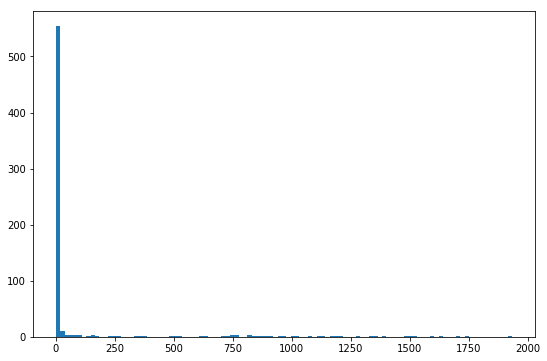

In [239]:
plt.figure(figsize = (9,6))
plt.hist(per_user_spams["pus"], bins=int(len(np.unique(per_user_spams["pus"]))))

In [242]:
is_spam_emails = email_emp_df[email_emp_df['content_x'].str.contains("ankh") & email_emp_df['content_x'].str.contains("prince") &
            email_emp_df['content_x'].str.contains("ahmose")]

In [245]:
is_spam_emails['date'] = pd.to_datetime(is_spam_emails['date'])

C:\Users\talha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


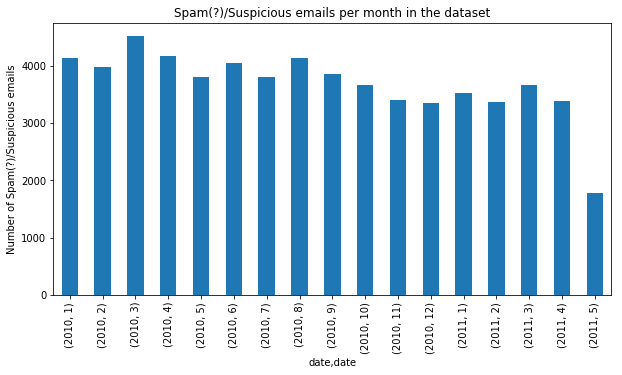

In [319]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Year, Month")
plt.ylabel("Number of Spam(?)/Suspicious emails")
plt.title("Spam(?)/Suspicious emails per month in the dataset")
is_spam_emails.groupby([is_spam_emails["date"].dt.year, is_spam_emails["date"].dt.month]).size().plot(kind="bar")

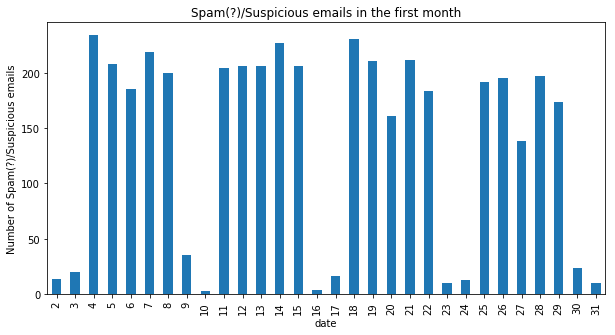

In [320]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Day")
plt.ylabel("Number of Spam(?)/Suspicious emails")
plt.title("Spam(?)/Suspicious emails in the first month")
is_spam_emails[(is_spam_emails['date'].dt.year.isin([2010])) & (is_spam_emails['date'].dt.month.isin([1]))].groupby(
    [is_spam_emails["date"].dt.day]).size().plot(kind="bar")

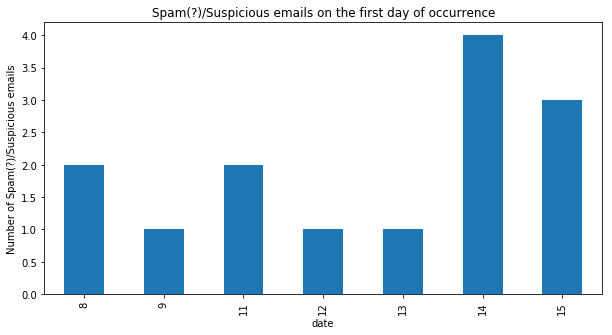

In [321]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Hour")
plt.ylabel("Number of Spam(?)/Suspicious emails")
plt.title("Spam(?)/Suspicious emails on the first day of occurrence")
is_spam_emails[(is_spam_emails['date'].dt.year.isin([2010])) & (is_spam_emails['date'].dt.month.isin([1])) &
              (is_spam_emails['date'].dt.day.isin([2]))].groupby(
    [is_spam_emails["date"].dt.hour]).size().plot(kind="bar")

## Spam files?

In [265]:
# 2.12 % of total files
spam_files = file_emp_df[file_emp_df['content'].str.contains("ankh") & file_emp_df['content'].str.contains("prince") &
            file_emp_df['content'].str.contains("ahmose")]

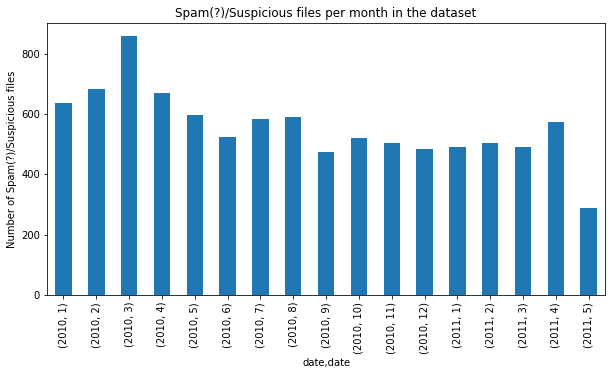

In [271]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Year, Month")
plt.ylabel("Number of Spam(?)/Suspicious files")
plt.title("Spam(?)/Suspicious files per month in the dataset")
spam_files.groupby([spam_files["date"].dt.year, spam_files["date"].dt.month]).size().plot(kind="bar")

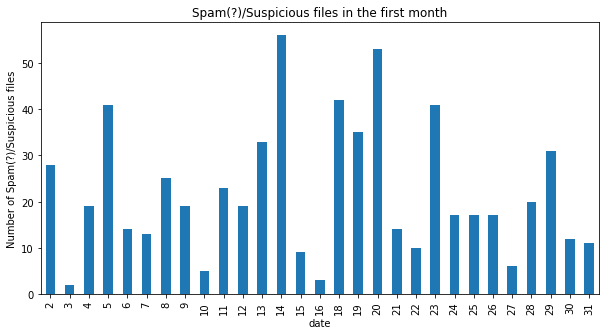

In [273]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Day")
plt.ylabel("Number of Spam(?)/Suspicious files")
plt.title("Spam(?)/Suspicious files in the first month")
spam_files[(spam_files['date'].dt.year.isin([2010])) & (spam_files['date'].dt.month.isin([1]))].groupby(
    [spam_files["date"].dt.day]).size().plot(kind="bar")

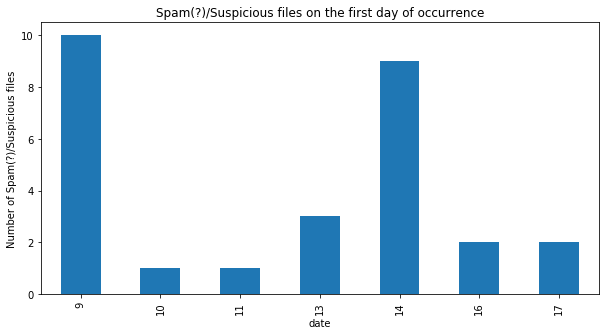

In [323]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Year, Month")
plt.ylabel("Number of Spam(?)/Suspicious files")
plt.title("Spam(?)/Suspicious files on the first day of occurrence")
spam_files[(spam_files['date'].dt.year.isin([2010])) & (spam_files['date'].dt.month.isin([1])) &
              (spam_files['date'].dt.day.isin([2]))].groupby(
    [spam_files["date"].dt.hour]).size().plot(kind="bar")

##### Okay, so apparently, @ 8am an email was received and @ 9am on the same day, this content was transferred/copied onto 10 thumb drives. 

##### Quesions: 
 - Where did that email come from? 
 - Why did that user send this email? Did he visit a malicious website before that? Analyze http info.
 - Which users are copying this content on to their thumb drives? Are these the same user(s) who received that email? If not, how did they come across this content? Did they receive emails from that first person?

##### Employee sending these emails in the first couple of hours

In [296]:
pd.set_option("display.max_colwidth", 20)
is_spam_emails[(is_spam_emails['date'].dt.year.isin([2010])) & (is_spam_emails['date'].dt.month.isin([1])) &
              (is_spam_emails['date'].dt.day.isin([2])) & (is_spam_emails['date'].dt.hour.isin([8,9]))]

,date,user,pc,to,cc,bcc,from,size,attachments,content_x,...,user_id,email,role,team,functional_unit,department,supervisor,left,avg_email_sent,last_empl_month
27747,2010-01-02 08:44:24,HSB0196,PC-8001,August.Armando.E...,NaN,NaN,Hadley.Sonya.Bow...,38026,0,prince prince pr...,...,HSB0196,Hadley.Sonya.Bow...,PurchasingClerk,NaN,6 - PurchasingAn...,1 - Purchasing,August Armando E...,0,0.003294,2011-06-01
27749,2010-01-02 08:58:28,HSB0196,PC-8001,August.Armando.E...,NaN,NaN,Hadley.Sonya.Bow...,26047,0,prince prince ah...,...,HSB0196,Hadley.Sonya.Bow...,PurchasingClerk,NaN,6 - PurchasingAn...,1 - Purchasing,August Armando E...,0,0.003294,2011-06-01
27751,2010-01-02 09:10:09,HSB0196,PC-8001,Yolanda.Idona.Cr...,NaN,NaN,Hadley.Sonya.Bow...,16641,0,prince prince pr...,...,HSB0196,Hadley.Sonya.Bow...,PurchasingClerk,NaN,6 - PurchasingAn...,1 - Purchasing,August Armando E...,0,0.003294,2011-06-01


##### Employee sending these emails during the first day

In [333]:
pd.set_option("display.max_colwidth", 200)
is_spam_emails[(is_spam_emails['date'].dt.year.isin([2010])) & (is_spam_emails['date'].dt.month.isin([1])) &
              (is_spam_emails['date'].dt.day.isin([2]))][['date','user','from','to', 'pc']]

,date,user,from,to,pc
27747,2010-01-02 08:44:24,HSB0196,Hadley.Sonya.Bowen@dtaa.com,August.Armando.Evans@dtaa.com,PC-8001
27749,2010-01-02 08:58:28,HSB0196,Hadley.Sonya.Bowen@dtaa.com,August.Armando.Evans@dtaa.com;Yolanda.Idona.Crosby@dtaa.com,PC-8001
27751,2010-01-02 09:10:09,HSB0196,Hadley.Sonya.Bowen@dtaa.com,Yolanda.Idona.Crosby@dtaa.com;Sawyer.Abel.Turner@dtaa.com,PC-8001
27752,2010-01-02 11:06:42,HSB0196,Hadley.Sonya.Bowen@dtaa.com,August.Armando.Evans@dtaa.com;Yolanda.Idona.Crosby@dtaa.com;Callum.Scott.Parrish@dtaa.com;Padilla.Malachi@harris.com,PC-8001
27753,2010-01-02 11:42:04,HSB0196,Hadley.Sonya.Bowen@dtaa.com,Callum.Scott.Parrish@dtaa.com,PC-8001
67380,2010-01-02 12:55:31,IRM0931,Ignatius.Reese.Morton@dtaa.com,Caleb.Mason.Ball@dtaa.com,PC-7188
67385,2010-01-02 13:01:12,IRM0931,Ignatius.Reese.Morton@dtaa.com,Caleb.Mason.Ball@dtaa.com;Dominic.Howard.Mcconnell@dtaa.com,PC-7188
125688,2010-01-02 14:02:10,BRS0734,Burke.Rooney.Stafford@dtaa.com,Quincy.Preston.Moses@dtaa.com,PC-4785
125690,2010-01-02 14:14:22,BRS0734,Burke.Rooney.Stafford@dtaa.com,Aurora.Jael.Hopkins@dtaa.com,PC-4785
125691,2010-01-02 14:25:10,BRS0734,Burke.Rooney.Stafford@dtaa.com,Robert.Zeus.Cox@dtaa.com,PC-4785


In [349]:
# from_to_emails = is_spam_emails[(is_spam_emails['date'].dt.year.isin([2010])) & (is_spam_emails['date'].dt.month.isin([1])) &
#               (is_spam_emails['date'].dt.day.isin([2]))][['from','to']]
# lst_col = 'to'
# x = from_to_emails.assign(**{lst_col:from_to_emails[lst_col].str.split(';')})
# print(x.shape)

# from_to = pd.DataFrame({
#         col:np.repeat(x[col].values, x[lst_col].str.len())
#         for col in x.columns.difference([lst_col])
#     }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
# print(from_to.shape)


# from_cc_emails = is_spam_emails[(is_spam_emails['date'].dt.year.isin([2010])) & (is_spam_emails['date'].dt.month.isin([1])) &
#               (is_spam_emails['date'].dt.day.isin([2])) & (is_spam_emails['cc'].notnull())][['from','cc']]
# lst_col = 'cc'
# x = from_cc_emails.assign(**{lst_col:from_cc_emails[lst_col].str.split(';')})
# print(x.shape)

# from_cc = pd.DataFrame({
#         col:np.repeat(x[col].values, x[lst_col].str.len())
#         for col in x.columns.difference([lst_col])
#     }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
# print(from_cc.shape)


# print(from_to)
# print(from_cc)

# bigdata = from_to.append(from_cc, ignore_index=True)

# print(bigdata)

In [318]:
pd.set_option("display.max_colwidth", 40)
spam_files[(spam_files['date'].dt.year.isin([2010])) & (spam_files['date'].dt.month.isin([1])) &
              (spam_files['date'].dt.day.isin([2])) & (spam_files['date'].dt.hour.isin([8,9]))][
    ['date', 'user', 'pc', 'filename', 'role', 'supervisor', 'left', 'content']]

,date,user,pc,filename,role,supervisor,left,content
id,,,,,,,,
{L3S7-C8TZ87ZS-4804FLTA},2010-01-02 09:48:16,HSB0196,PC-8001,OIDKEAQQ.doc,PurchasingClerk,August Armando Evans,0,D0-CF-11-E0-A1-B1-1A-E1 prince princ...
{Q6S2-F3YI35AD-4917KRZO},2010-01-02 09:48:23,HSB0196,PC-8001,H4TW0GOU.doc,PurchasingClerk,August Armando Evans,0,D0-CF-11-E0-A1-B1-1A-E1 prince princ...
{F4C7-X1HW55XP-5693KFWA},2010-01-02 09:48:27,HSB0196,PC-8001,52G2H8B2.doc,PurchasingClerk,August Armando Evans,0,D0-CF-11-E0-A1-B1-1A-E1 prince princ...
{A9R7-E8SK40KZ-8970AEDG},2010-01-02 09:48:29,HSB0196,PC-8001,4OFNLN94.zip,PurchasingClerk,August Armando Evans,0,50-4B-03-04-14 ahmose prince ahmose ...
{K3V4-E0XW36HA-3405OSIX},2010-01-02 09:49:03,HSB0196,PC-8001,T4V7DFJ7.pdf,PurchasingClerk,August Armando Evans,0,25-50-44-46-2D prince prince prince ...
{V8G8-F1JE53MH-9305REPD},2010-01-02 09:49:05,HSB0196,PC-8001,IXUOKKJ3.doc,PurchasingClerk,August Armando Evans,0,D0-CF-11-E0-A1-B1-1A-E1 prince princ...
{Y9P6-F4AE69OE-4489JOFS},2010-01-02 09:49:27,HSB0196,PC-8001,1FPLTM6V.doc,PurchasingClerk,August Armando Evans,0,D0-CF-11-E0-A1-B1-1A-E1 ahmose princ...
{E9T1-E8YU56JM-4397YYEX},2010-01-02 09:49:28,HSB0196,PC-8001,VHBS4435.doc,PurchasingClerk,August Armando Evans,0,D0-CF-11-E0-A1-B1-1A-E1 prince princ...
{B1L1-Q9KW21AQ-1209OABD},2010-01-02 09:49:30,HSB0196,PC-8001,Y0S2NYZE.txt,PurchasingClerk,August Armando Evans,0,55-59-56-38 prince prince prince pri...


#### Okay, apparenty, it's the user HSB0196 (Hadley.Sonya.Bowen@dtaa.com) who sent the very first emails and transferred this content onto a bunch of different files. The difference between the timings is not significant. All this content was transferred within 1 minute. So probably, it was transferred to the same device/thumb drive. Need to look into device.csv in order to further investigate this. Which device was this? Where did this content get transferred from here?

### Get device.csv

In [300]:
device_info = "C:/Users/talha/Documents/DA/da_project/dataset2/device_info.csv"
device_df = pd.read_csv(device_info)
device_df.head()

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


##### Look at the user I am interested in (HSB0196) - This user has 1.87% percent of total connet/disconnets. Not that abnormal give that there are 1000 users. This user has only used 1 PC (PC-8001). We don't have device_id? So how do we track this? We can try to flag these files and see where they appear later?

In [308]:
device_df[device_df['user']=='HSB0196'].groupby('pc').size()

pc
PC-8001    7595
dtype: int64

In [314]:
device_df['id'].unique()

array(['{J1S3-L9UU75BQ-7790ATPL}', '{N7B5-Y7BB27SI-2946PUJK}',
       '{U1V9-Z7XT67KV-5649MYHI}', ..., '{I3V8-Q1KQ57JG-4571IXHJ}',
       '{W9Y8-O7VO98OA-0160JVWR}', '{Q1D6-M5WM07CO-7386LSII}'], dtype=object)

## HTTP info?

In [281]:
http_info = "C:/Users/talha/Documents/DA/da_project/url-sentiment-analysis/user_url_list.csv"
http_users = pd.read_csv(http_info)

In [282]:
http_users.head()

,user,url
0,LRR0148,http://msn.com/The_Human_Centipede_First_Sequence/katsuro/arjf309875127.htm
1,NGF0157,http://urbanspoon.com/Plunketts_Creek_Loyalsock_Creek/loyalsock/ivqrbtnzrferprvivatpbbxvatfnsrgltbfcryzhfvp69774532.jsp
2,NGF0157,http://aa.com/Rhodocene/rhodocenium/fhaavatqrfxgbcrkrphgvir1766627142.html
3,IRM0931,http://groupon.com/Leonhard_Euler/leonhard/tneqravafrpgfsvfuvatobng292602446.php
4,IRM0931,http://flickr.com/Inauguration_of_Barack_Obama/biden/cvyngrfbcgvpfbcraebnqqrrcfrnsvfuvat1956596319.jsp


In [275]:
http_content_df = pd.read_csv("C:/Users/talha/Documents/DA/da_project/url-sentiment-analysis/url_google_sentiment_analysis.csv")

In [277]:
# 0.28 % of the total
spam_url = http_content_df[http_content_df['content'].str.contains("ankh") & http_content_df['content'].str.contains("prince") &
            http_content_df['content'].str.contains("ahmose")]

KeyError: 'date'

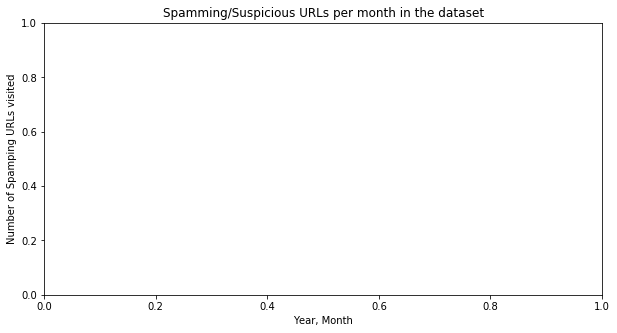

In [280]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Year, Month")
plt.ylabel("Number of Spamping URLs visited")
plt.title("Spamming/Suspicious URLs per month in the dataset")
spam_url.groupby([spam_url["date"].dt.year, spam_url["date"].dt.month]).size().plot(kind="bar")

In [279]:
http_content_df.shape

(6033, 6)